In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tab = pd.read_csv("2022_Test_ML.csv")

In [3]:
len(tab)

500

In [4]:
tab.head()

,ind,s_mt,s_mq,d,h_p,QW,DP
0,0,1.409218,1.954108,2.867735,7.811623,1504.175621,501.563016
1,1,1.382565,2.006212,1.545090,8.124248,1240.530500,377.163158
2,2,1.622445,1.386172,1.192385,7.354709,1385.191155,457.404772
3,3,1.786172,1.591984,2.350701,4.324649,1602.841975,1429.795145
4,4,1.995591,2.024449,1.208417,6.993988,1326.290979,514.009143


In [5]:
tab["ind"].describe()

count    500.000000
mean     249.500000
std      144.481833
min        0.000000
25%      124.750000
50%      249.500000
75%      374.250000
max      499.000000
Name: ind, dtype: float64

In [6]:
tab["s_mt"].describe()

count    500.000000
mean       1.750000
std        0.550131
min        0.800000
25%        1.275000
50%        1.750000
75%        2.225000
max        2.700000
Name: s_mt, dtype: float64

<Axes: >

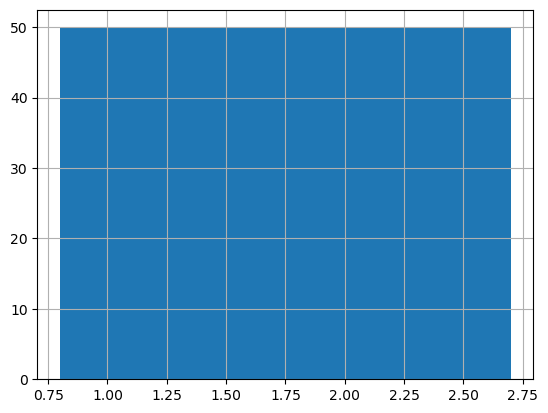

In [7]:
tab["s_mt"].hist()

In [8]:
tab["s_mq"].describe()

count    500.000000
mean       1.450000
std        0.376406
min        0.800000
25%        1.125000
50%        1.450000
75%        1.775000
max        2.100000
Name: s_mq, dtype: float64

<Axes: >

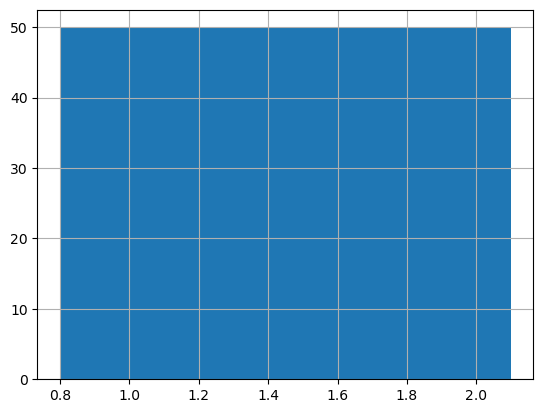

In [9]:
tab["s_mq"].hist()

In [10]:
tab["d"].describe()

count    500.000000
mean       2.000000
std        0.579086
min        1.000000
25%        1.500000
50%        2.000000
75%        2.500000
max        3.000000
Name: d, dtype: float64

<Axes: >

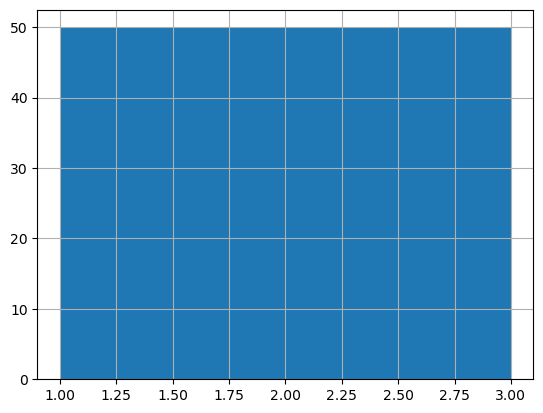

In [11]:
tab["d"].hist()

In [12]:
tab["h_p"].describe()

count    500.000000
mean       7.000000
std        1.737257
min        4.000000
25%        5.500000
50%        7.000000
75%        8.500000
max       10.000000
Name: h_p, dtype: float64

<Axes: >

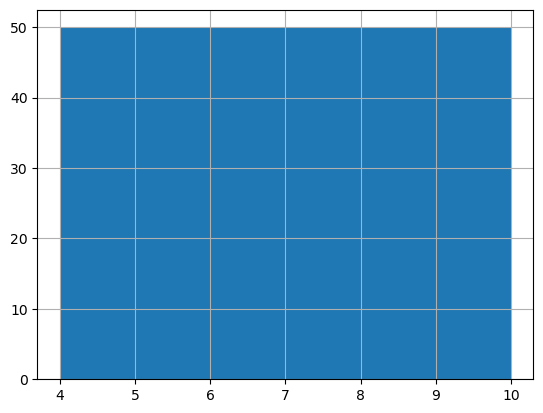

In [13]:
tab["h_p"].hist()

In [14]:
tab["QW"].describe()

count     500.000000
mean     1498.578955
std       163.293098
min      1067.505110
25%      1398.452956
50%      1506.174741
75%      1605.163589
max      1870.757813
Name: QW, dtype: float64

<Axes: >

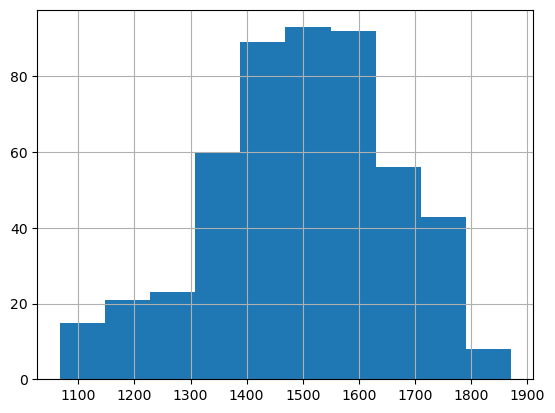

In [15]:
tab["QW"].hist()

In [16]:
tab["DP"].describe()

count     500.000000
mean      668.927498
std       337.472251
min       261.554292
25%       410.931713
50%       554.783459
75%       845.136952
max      1923.886333
Name: DP, dtype: float64

<Axes: >

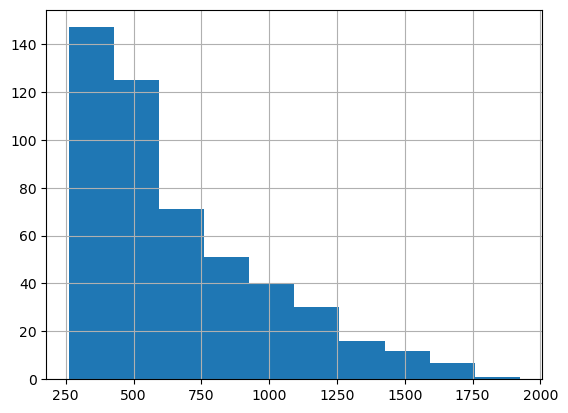

In [17]:
tab["DP"].hist()

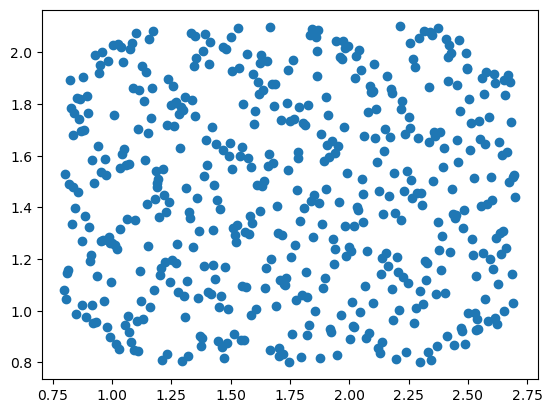

In [18]:
plt.scatter(tab["s_mt"], tab["s_mq"])

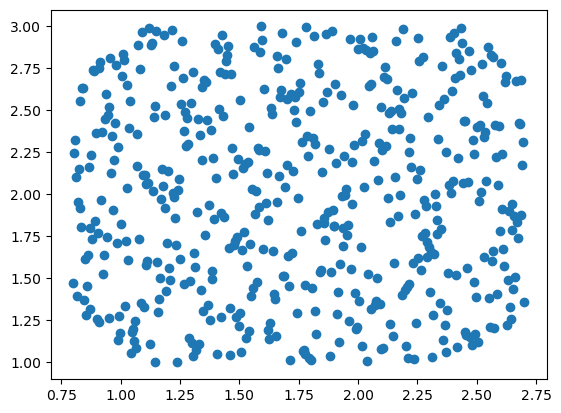

In [19]:
plt.scatter(tab["s_mt"], tab["d"])

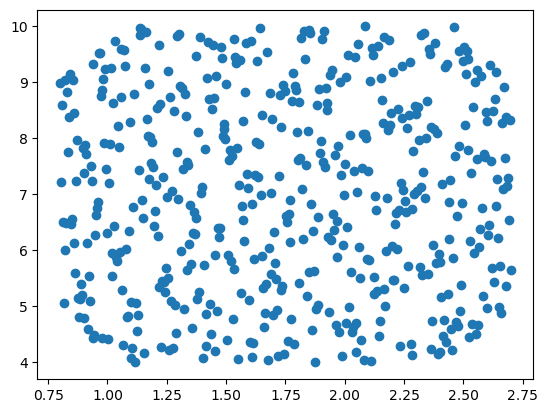

In [20]:
plt.scatter(tab["s_mt"], tab["h_p"])

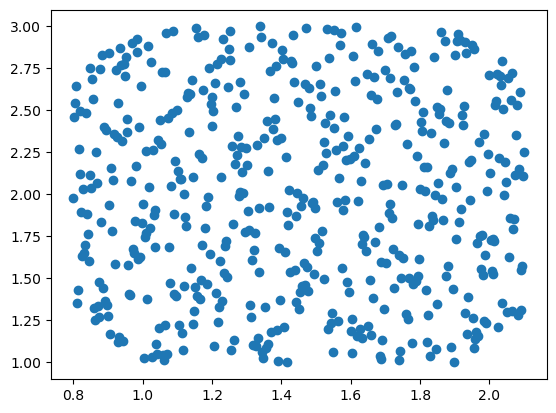

In [21]:
plt.scatter(tab["s_mq"], tab["d"])

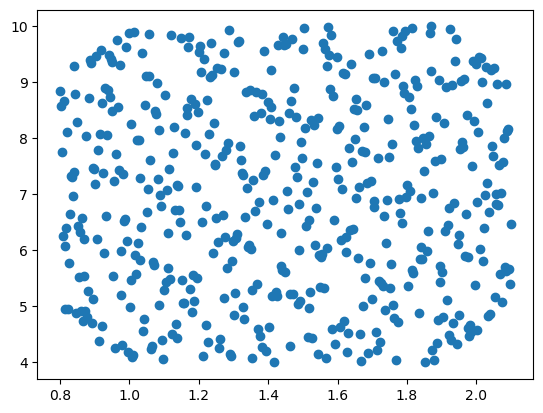

In [22]:
plt.scatter(tab["s_mq"], tab["h_p"])

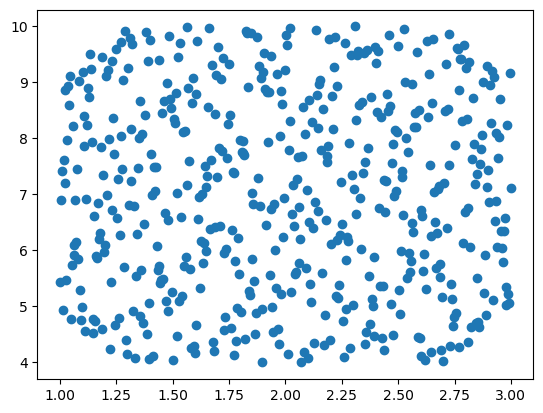

In [23]:
plt.scatter(tab["d"], tab["h_p"])

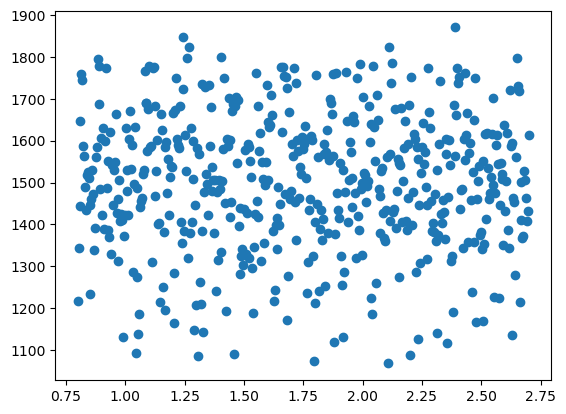

In [24]:
plt.scatter(tab["s_mt"], tab["QW"])

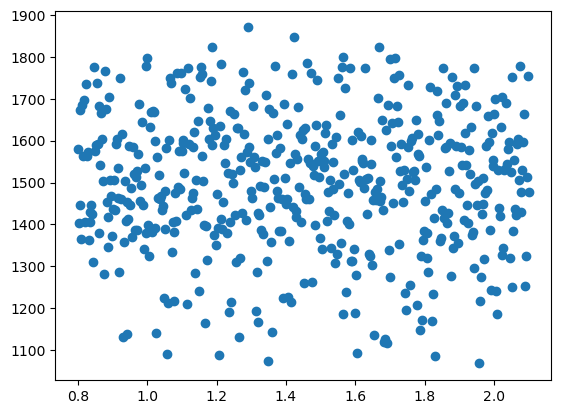

In [25]:
plt.scatter(tab["s_mq"], tab["QW"])

Text(0, 0.5, 'QW')

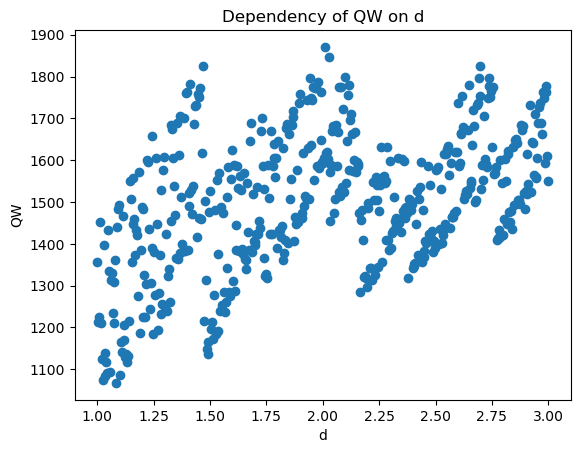

In [26]:
plt.scatter(tab["d"], tab["QW"])
plt.title("Dependency of QW on d")
plt.xlabel("d")
plt.ylabel("QW")

In [27]:
tab["d1"] = tab["d"].apply(lambda x: int(2*x))
tab["d2"] = 2*tab["d"] - tab["d1"]

Text(0, 0.5, 'QW')

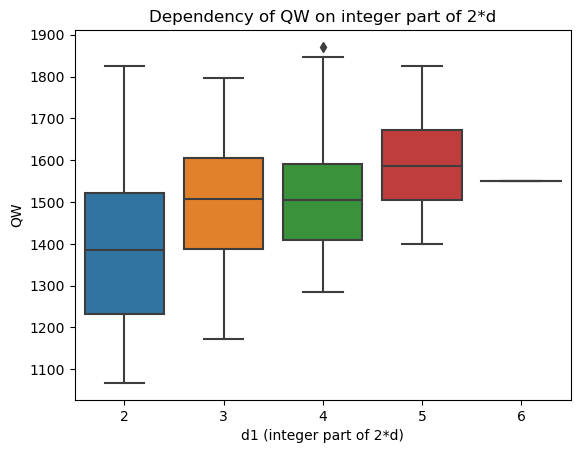

In [28]:
sns.boxplot(y=tab["QW"], x=tab["d1"])
plt.title("Dependency of QW on integer part of 2*d")
plt.xlabel("d1 (integer part of 2*d)")
plt.ylabel("QW")

Text(0, 0.5, 'QW')

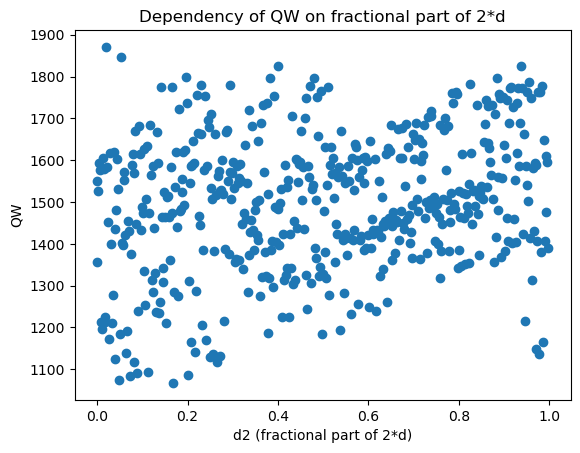

In [29]:
plt.scatter(tab["d2"], tab["QW"])
plt.title("Dependency of QW on fractional part of 2*d")
plt.xlabel("d2 (fractional part of 2*d)")
plt.ylabel("QW")

Text(0, 0.5, 'QW')

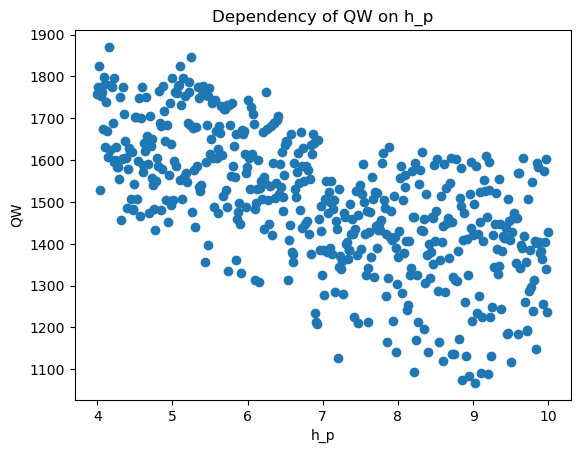

In [30]:
plt.scatter(tab["h_p"], tab["QW"])
plt.title("Dependency of QW on h_p")
plt.xlabel("h_p")
plt.ylabel("QW")

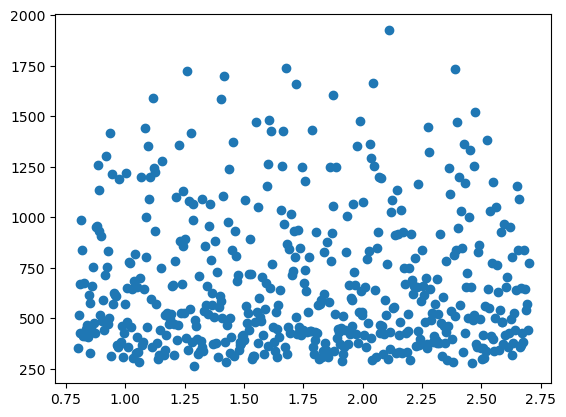

In [31]:
plt.scatter(tab["s_mt"], tab["DP"])

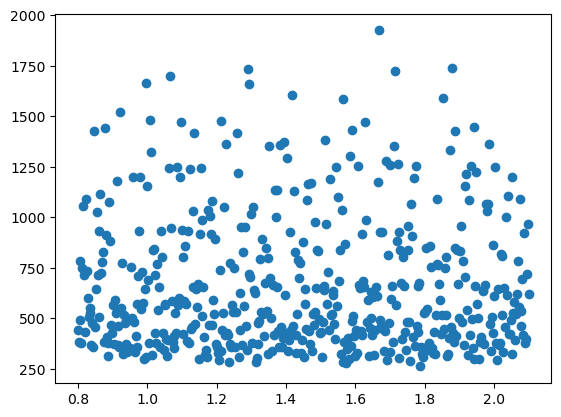

In [32]:
plt.scatter(tab["s_mq"], tab["DP"])

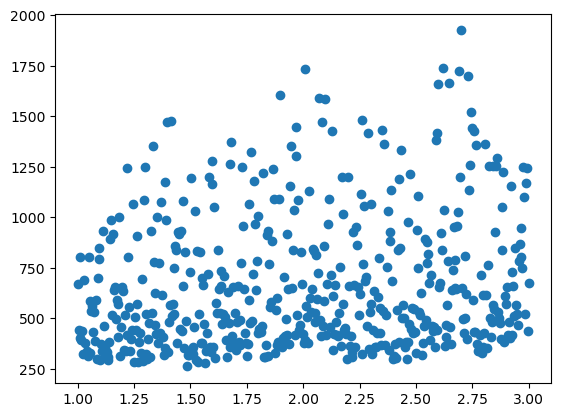

In [33]:
plt.scatter(tab["d"], tab["DP"])

Text(0, 0.5, 'DP')

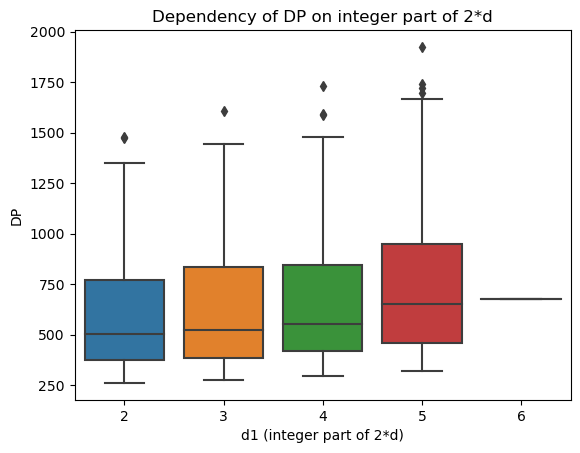

In [34]:
sns.boxplot(y=tab["DP"], x=tab["d1"])
plt.title("Dependency of DP on integer part of 2*d")
plt.xlabel("d1 (integer part of 2*d)")
plt.ylabel("DP")

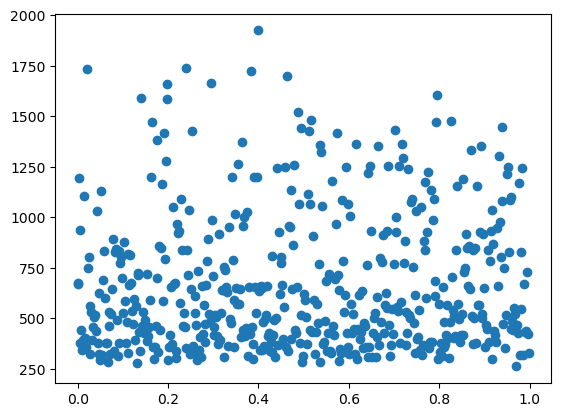

In [35]:
plt.scatter(tab["d2"], tab["DP"])

Text(0, 0.5, 'DP')

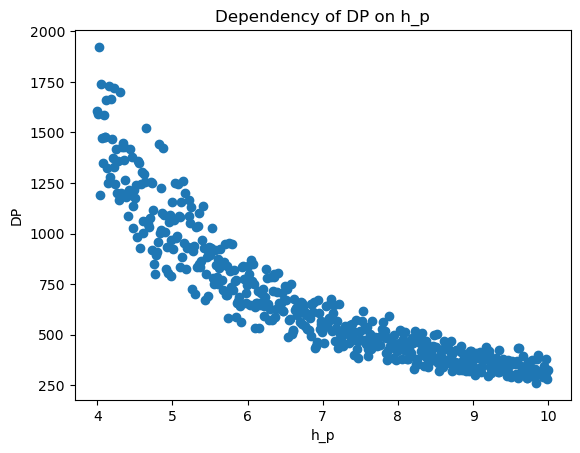

In [36]:
plt.scatter(tab["h_p"], tab["DP"])
plt.title("Dependency of DP on h_p")
plt.xlabel("h_p")
plt.ylabel("DP")

Text(0, 0.5, 'DP')

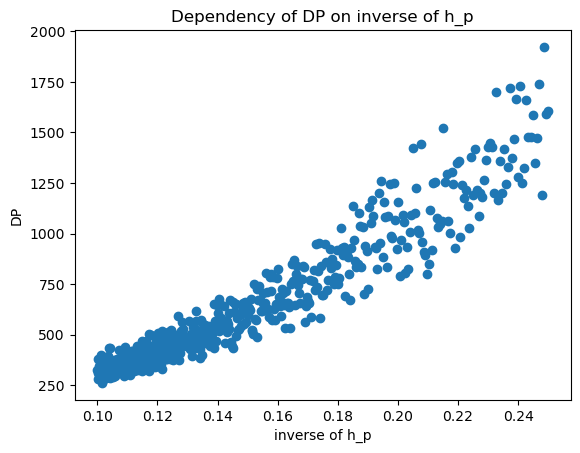

In [37]:
plt.scatter(1/tab["h_p"], tab["DP"])
plt.title("Dependency of DP on inverse of h_p")
plt.xlabel("inverse of h_p")
plt.ylabel("DP")

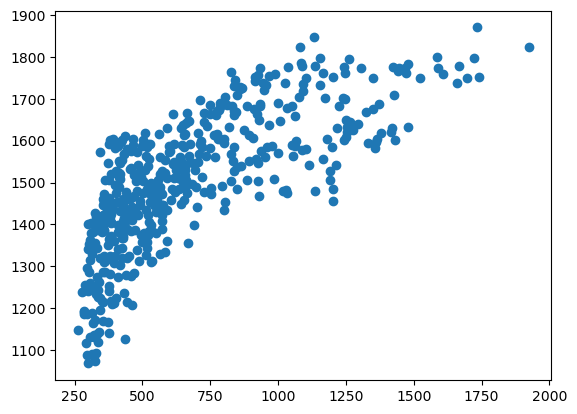

In [38]:
plt.scatter(tab["DP"], tab["QW"])

Conclusions:

1. For QW it makes sense to consider a linear regression on d1 (integer part of 2d), d2 (fractional part of 2d), h_p in a class of interpretable models. We will consider a catboost regression on s_mt, s_mq, d, h_p, d1, d2, h_p_inverse (inverse to h_p) in a class of non-interpretable models for QW.

2. For DP it makes sense to consider a linear regression on d1 (integer part of 2d), h_p_inverse (inverse to h_p) in a class of interpretable models. We will consider a catboost regression on s_mt, s_mq, d, h_p, d1, d2, h_p_inverse (inverse to h_p) in a class of non-interpretable models for DP.